<a href="https://colab.research.google.com/github/tnthdrhks1/knu_machine_learning/blob/main/1213_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
file = glob('*.mp4')
video = file[1]

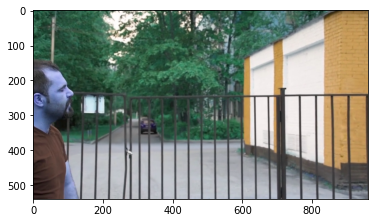

In [ ]:
import cv2
vidcap = cv2.VideoCapture(video)
success,image = vidcap.read()
count = 0
success = True
while success:
  success,image = vidcap.read()
  #cv2.imwrite("frame%d.jpg" % count, image)     # save frame as JPEG file
  count += 1
  if count == 30*10:
    plt.imshow(image)
  if count == 30*100:
    break


In [ ]:
def video_to_images(path):
  list_image = []

  vidcap = cv2.VideoCapture(path)
  success,image = vidcap.read()
  count = 0
  while success:          
    if True: #색감이 이상할때 
      B, G, R = np.split(image, 3, axis=-1)
      image = np.concatenate((R, G, B), -1)    
    
    if count%10==0 : print(count)

    list_image.append(image)

    success,image = vidcap.read()      
    count += 1
  return list_image

In [ ]:
img = video_to_images(video)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490


In [ ]:
len(img)

498

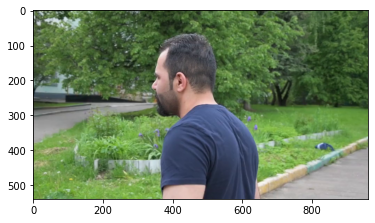

In [ ]:
plt.imshow(img[0])

# blacklabel 한걸로 

In [ ]:
file = sorted(glob('*.xml'))
file

['00000000.xml',
 '00000001.xml',
 '00000002.xml',
 '00000003.xml',
 '00000004.xml',
 '00000005.xml',
 '00000006.xml',
 '00000007.xml',
 '00000008.xml',
 '00000009.xml',
 '00000010.xml',
 '00000011.xml',
 '00000012.xml',
 '00000013.xml',
 '00000014.xml',
 '00000015.xml',
 '00000016.xml',
 '00000017.xml',
 '00000018.xml',
 '00000019.xml',
 '00000020.xml',
 '00000021.xml',
 '00000022.xml',
 '00000023.xml',
 '00000024.xml',
 '00000025.xml',
 '00000026.xml',
 '00000027.xml',
 '00000028.xml',
 '00000029.xml',
 '00000030.xml',
 '00000031.xml',
 '00000032.xml',
 '00000033.xml',
 '00000034.xml',
 '00000035.xml',
 '00000036.xml',
 '00000037.xml',
 '00000038.xml',
 '00000039.xml',
 '00000040.xml',
 '00000041.xml',
 '00000042.xml',
 '00000043.xml',
 '00000044.xml',
 '00000045.xml',
 '00000046.xml',
 '00000047.xml',
 '00000048.xml',
 '00000049.xml',
 '00000050.xml',
 '00000051.xml',
 '00000052.xml',
 '00000053.xml',
 '00000054.xml',
 '00000055.xml',
 '00000056.xml',
 '00000057.xml',
 '00000058.xml

In [ ]:
file[0]

'00000000.xml'

In [ ]:
import xml.etree.ElementTree as ET 
import requests 

In [ ]:
def find(file):
  listbox = []

  xmlfile = file
  tree = ET.parse(xmlfile) 
  root = tree.getroot() 
  obj = root.findall('object')

  for o in obj:
    bndbox = o.find('bndbox')
    xmin = bndbox.find('xmin').text
    ymin = bndbox.find('ymin').text
    xmax = bndbox.find('xmax').text
    ymax = bndbox.find('ymax').text
    box = np.array([xmin, ymin, xmax, ymax], np.int)
    listbox.append(box)
    
  # listbox = np.array(listbox)
  return listbox

In [ ]:
find(file[0])

[array([337,  69, 531, 305])]

In [ ]:
list_frame = []
for files in file:
  list_frame.append(find(files))
  
list_frame

In [ ]:
len(list_frame), len(file)

(498, 498)

In [ ]:
frame = list_frame[0]
img[0].shape, frame

((540, 960, 3), [array([337,  69, 531, 305])])

In [ ]:
type(list_frame[0][0][0])

numpy.int64

In [ ]:
from PIL import Image, ImageDraw

In [ ]:
list_imgbox = []
for i in range (len(img)):
  im = Image.fromarray(img[i])
  draw = ImageDraw.Draw(im)
  for box in list_frame[i]:
    draw.rectangle(list(box),fill=None, outline=(255,0,0), width=5) #튜플이 아니라는 개소리 짓거렸는데 까고보니 타입이 int가 아니어서 그런거
  list_imgbox.append(im)

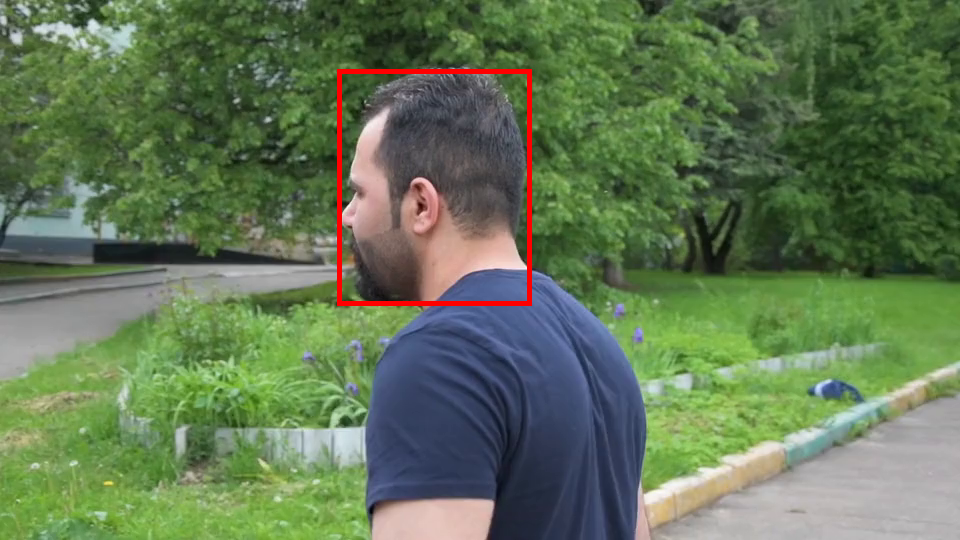

In [ ]:
list_imgbox[0]

- id 0 , 1 존재
- 0(백) > 0(백) 1(흑) > 0(백) > 0(백) 2(흑)

In [ ]:
len(list_frame)

498

#얼굴에 라벨링 + ID + 자르기


In [ ]:
from PIL import ImageFont, ImageDraw
import PIL

In [ ]:
obj_on_img = 0
frame_id = []
center = []
bef_center = []
id_list = []

for i in range(len(list_frame)):
  id = 0
  frame = list_frame[i]
  boxes = np.array(frame)
  box_l = len(boxes)

  for q in range (box_l):
    x0, y0, x1, y1 = np.split(frame[q-1], 4, axis = 0)
    x_mid = (x1+x0)/2
    y_mid = (y1+y0)/2
    bef_center.append([x_mid[0], y_mid[0]])
  center.append(bef_center)
  bef_center = []

  if obj_on_img != box_l:
    for j in range (box_l - obj_on_img):
      id_list.append(id)
      id = id + 1
    frame_id.append(id_list)
    id_list = []

In [ ]:
frame_id[19], list_frame[0]

([0, 1], [array([337,  69, 531, 305])])

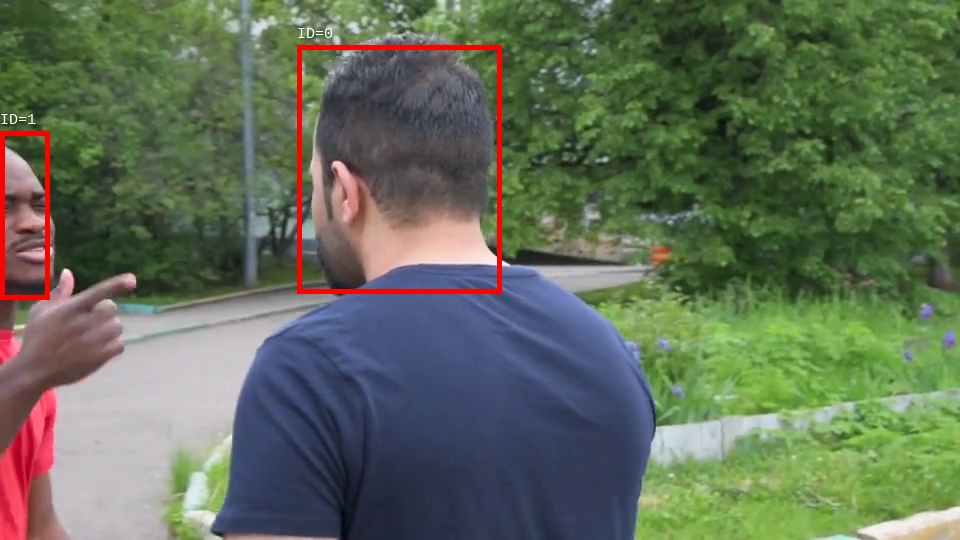

In [ ]:
list_imgbox = []
font = PIL.ImageFont.truetype('/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf', 15)
list_blk_face = []
list_wht_face = []

for i in range (len(img)):
  num = 0
  im = Image.fromarray(img[i])
  draw = ImageDraw.Draw(im)
  for box in list_frame[i]:
    draw.rectangle(list(box),fill=None, outline=(255,0,0), width=5) #튜플이 아니라는 개소리 짓거렸는데 까고보니 타입이 int가 아니어서 그런거
    draw.text((list(box)[0],list(box)[1]-20),'ID='+str(frame_id[i][num]),font=font)
    face = Image.fromarray(img[i]).crop(list_frame[i][num])
    num=num+1
    if num == 1:
      list_wht_face.append(np.array(face))
    else:
      list_blk_face.append(np.array(face))

  list_imgbox.append(im)
# box = np.array([xmin, ymin, xmax, ymax], np.int)
list_imgbox[20]

In [ ]:
Image.fromarray(list_wht_face[5]).size

(194, 236)

In [ ]:
len(list_wht_face), len(list_blk_face)

(498, 424)

In [ ]:
wface = np.array(list_wht_face[:10])
wface.shape

(10, 236, 194, 3)

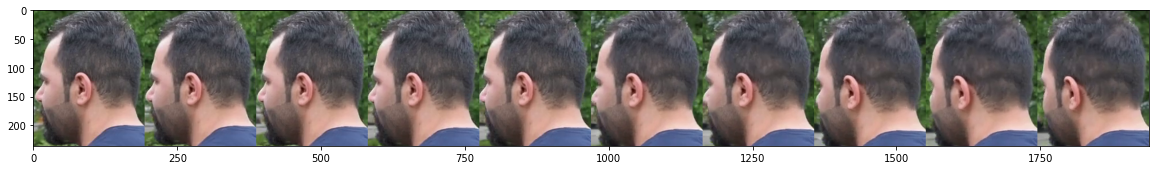

In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(wface.transpose(1,0,2,3).reshape(-1,10*194,3))

#분류기

In [ ]:
wht_np = np.array(list_wht_face[12:13])
wht_np.shape

(1, 248, 204, 3)

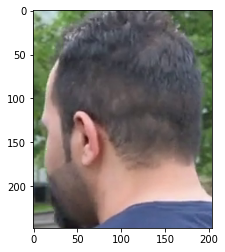

In [ ]:
plt.imshow(list_wht_face[13])